In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('/content/tvmarketing.csv')
# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (inventure)

In [3]:
advertising.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Regression plot

In [5]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

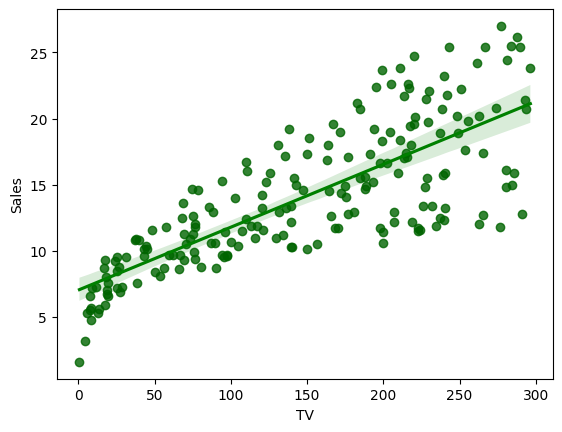

In [6]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="o",
    color="darkgreen",
    line_kws=dict(color="green"))


In [7]:
# pearson correlation koefficient

#VERSION 1:
advertising.corr() # calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [8]:
#VERSION2:
advertising['TV'].corr(advertising['Sales']) #positive & strong

0.7822244248616061

### SUPERVISED VS UNSUPERVISED

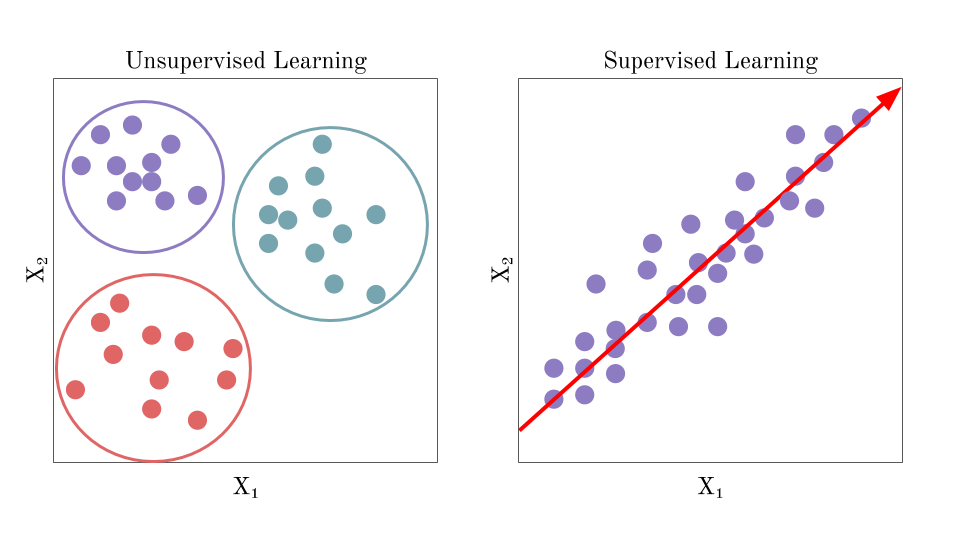

# Training linear regression model

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html:

In [ ]:
# Preparing X and Y

X = advertising.drop('Sales', axis=1) # indipendent variable
#axies=1 - makes colomn, axis=0 - makes row
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y = advertising.drop('TV', axis=1) # the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


## Train/Test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
# here it is good practise to use X as Capital letter and y as lower case
# 0.7 means 70% of the data should be used for training, 30% is used to test the model
# random_state=42 - means we get same result every time, without that, outcome is every time different
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [ ]:
# COLUMN - FEATURE
# ROW - OBSERVATION (nt. each picture)

###Train the model

In [ ]:
from sklearn.linear_model import LinearRegression # import the model

In [ ]:
model = LinearRegression() # initialize the model

In [ ]:
model.fit(X_train, y_train) # fit the model to our data ehk training the model

LinearRegression()

In [ ]:
### Y = mX + b ### this is linear regression, m is the slope

print(f'Model intercept is: {model.intercept_}') # intercept is where line intercepts with x or y axis
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


### A prediction

In [ ]:
my_new_budget = [[50]] # double [] are making 2D array dataset
my_predicted_sales = model.predict(my_new_budget)

print(f'When the n budget is {my_new_budget[0][0]}, theb predicted sales are {round(my_predicted_sales[0][0])}') # [][] indexis of 2D arrays

When the n budget is 50, theb predicted sales are 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head(5)

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [ ]:
 y_pred = model.predict(X_test) # it is allready 2D array

In [ ]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head(5)

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [ ]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales'] - final_df['Predicted_sales']) #ABS is absolute
final_df.head(5)

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


# Visualize the code

In [ ]:
final_df.reset_index(inplace=True)

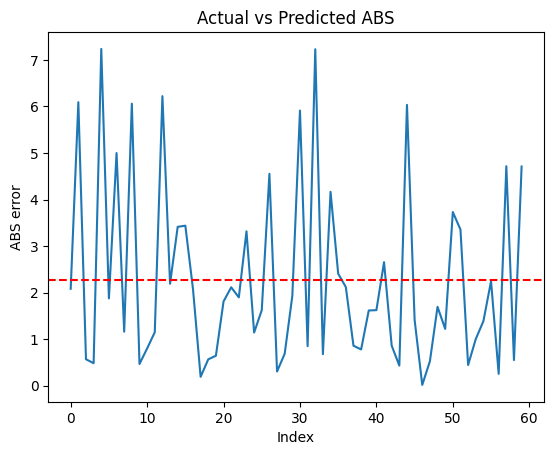

In [ ]:
import matplotlib.pyplot as plt
plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs Predicted ABS')
plt.xlabel('Index')
plt.ylabel('ABS error')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')

In [9]:
# MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)  # mae = mean absolute error
                                            # The lower the MAE, the more accurate our model is

NameError: name 'y_test' is not defined

### Just an example picture of mean absolute error
https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

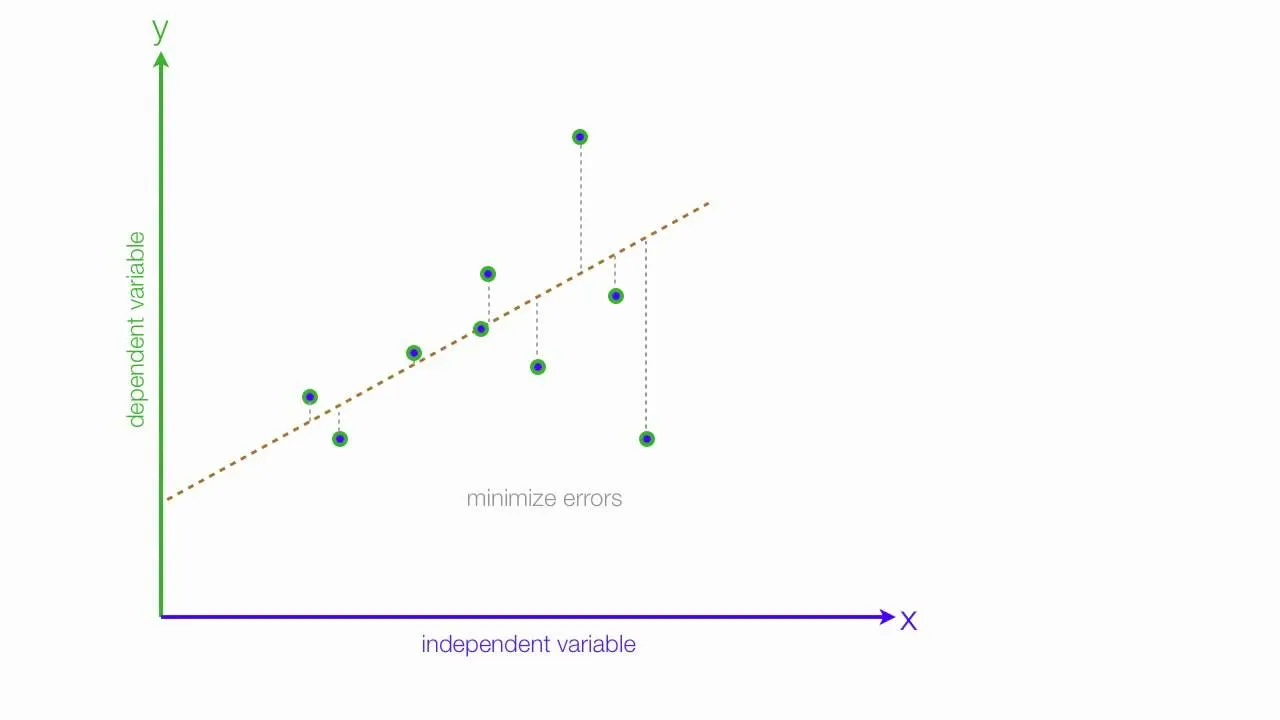

In [ ]:
print(f'Mean ABS error is: {mae}') # average distance between real and predicted data

Mean ABS error is: 2.2758809050205113


In [ ]:
# R2
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred) # mse = mean squared error
r2 = r2_score(y_test, y_pred)

print(f'MSE is: {mse}')
print(f'r2 is: {r2}')

MSE is: 8.970991242413614
r2 is: 0.6714477229302764
